# Exploration spark: "What's the most cliche song ever written? How do we even measure cliche-ness?"

In [1]:
import pandas as pd
import numpy as np

In [3]:
np.__version__

'1.19.5'

## Load the data through 2020, merge with genres
[data source](https://data.world/kcmillersean/billboard-hot-100-1958-2017/workspace/data-dictionary)

In [53]:
new_song_df = pd.read_csv('./data/Hot Stuff.csv')

In [58]:
new_song_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8


In [54]:
audio_features = pd.read_csv('./data/Hot 100 Audio Features.csv')

In [57]:
audio_features

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,...,-14.063,1.0,0.0315,0.91100,0.000267,0.1120,0.150,83.969,4.0,38.0
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,0.588,...,-17.278,0.0,0.0361,0.00256,0.745000,0.1450,0.801,121.962,4.0,11.0
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),0.759,...,-5.745,0.0,0.0307,0.20200,0.000131,0.4430,0.907,92.960,4.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29498,Zoo YorkLil Tjay Featuring Fivio Foreign & Pop...,Lil Tjay Featuring Fivio Foreign & Pop Smoke,Zoo York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29499,ZoomFuture,Future,Zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",2IG6Te7JyvrtqhFeOF7le4,https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,278429.0,True,FUTURE,0.852,...,-7.673,1.0,0.4260,0.01450,0.000000,0.2630,0.627,150.945,4.0,51.0
29500,ZoomLil' Boosie Featuring Yung Joc,Lil' Boosie Featuring Yung Joc,Zoom,"['baton rouge rap', 'deep southern trap']",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29501,Zorba The GreekHerb Alpert & The Tijuana Brass,Herb Alpert & The Tijuana Brass,Zorba The Greek,"['adult standards', 'easy listening', 'lounge']",3WLEVNohakzZmMpN5W7mHK,https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,264853.0,False,!!!Going Places!!!,0.531,...,-12.702,1.0,0.3230,0.15400,0.279000,0.0584,0.192,82.107,4.0,35.0


In [69]:
# Only keep songs that hit top 20
temp = new_song_df.sort_values('Peak Position').groupby(['SongID']).first()
only_top_20 = temp[temp['Peak Position'] <= 20].reset_index()
only_top_20

,SongID,url,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,#9 DreamJohn Lennon,http://www.billboard.com/charts/hot-100/1975-0...,2/22/1975,9,#9 Dream,John Lennon,1,10.0,9,10
1,#BeautifulMariah Carey Featuring Miguel,http://www.billboard.com/charts/hot-100/2013-0...,8/3/2013,37,#Beautiful,Mariah Carey Featuring Miguel,1,23.0,15,11
2,#SELFIEThe Chainsmokers,http://www.billboard.com/charts/hot-100/2014-0...,4/26/2014,33,#SELFIE,The Chainsmokers,1,20.0,16,7
3,#thatPOWERwill.i.am Featuring Justin Bieber,http://www.billboard.com/charts/hot-100/2013-0...,6/8/2013,19,#thatPOWER,will.i.am Featuring Justin Bieber,1,19.0,17,10
4,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,http://www.billboard.com/charts/hot-100/2002-1...,12/28/2002,4,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,1,5.0,4,10
...,...,...,...,...,...,...,...,...,...,...
7951,interludeJ. Cole,https://www.billboard.com/charts/hot-100/2021-...,5/29/2021,17,interlude,J. Cole,1,8.0,8,2
7952,"let.go.my.handJ. Cole, Bas & 6LACK",https://www.billboard.com/charts/hot-100/2021-...,5/29/2021,19,let.go.my.hand,"J. Cole, Bas & 6LACK",1,NaN,19,1
7953,"my.lifeJ. Cole, 21 Savage & Morray",https://www.billboard.com/charts/hot-100/2021-...,5/29/2021,2,my.life,"J. Cole, 21 Savage & Morray",1,NaN,2,1
7954,pride.is.the.devilJ. Cole & Lil Baby,https://www.billboard.com/charts/hot-100/2021-...,5/29/2021,7,pride.is.the.devil,J. Cole & Lil Baby,1,NaN,7,1


In [76]:
# merge on songId with audio features
merged_df = audio_features.merge(left_on='SongID', right=only_top_20, right_on='SongID', how='left')

In [77]:
USEFUL_COLUMNS = [
    'SongID', 'Performer_x', 'Song_x', 'spotify_genre',
       'spotify_track_preview_url',
       'spotify_track_explicit', 'spotify_track_album', 'WeekID', 'Week Position', 'Peak Position'
]
merged_df = merged_df[USEFUL_COLUMNS].rename(columns={'Performer_x': 'Performer', 'Song_x': 'Song'})
merged_df

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Week Position,Peak Position
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,False,The Essential Andy Williams,NaN,NaN,NaN
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",NaN,False,Compelling Percussion,NaN,NaN,NaN
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",https://p.scdn.co/mp3-preview/da2134a161f1cb34...,False,...Baby One More Time (Digital Deluxe Version),5/29/1999,31.0,1.0
...,...,...,...,...,...,...,...,...,...,...
29498,Zoo YorkLil Tjay Featuring Fivio Foreign & Pop...,Lil Tjay Featuring Fivio Foreign & Pop Smoke,Zoo York,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29499,ZoomFuture,Future,Zoom,"['atl hip hop', 'hip hop', 'pop rap', 'rap', '...",https://p.scdn.co/mp3-preview/cb8fde6edc08e70a...,True,FUTURE,NaN,NaN,NaN
29500,ZoomLil' Boosie Featuring Yung Joc,Lil' Boosie Featuring Yung Joc,Zoom,"['baton rouge rap', 'deep southern trap']",NaN,NaN,NaN,NaN,NaN,NaN
29501,Zorba The GreekHerb Alpert & The Tijuana Brass,Herb Alpert & The Tijuana Brass,Zorba The Greek,"['adult standards', 'easy listening', 'lounge']",https://p.scdn.co/mp3-preview/1841a4034ba42fc0...,False,!!!Going Places!!!,3/12/1966,43.0,11.0


## Parse genre

In [129]:
# TODO if needed

## Attach lyrics
[Start by just merging the lyrics scraped through 2019 by this person](https://towardsdatascience.com/sentiment-analysis-of-all-billboard-hot-100-songs-over-time-1958-2019-3329439e7c1a)


In [84]:
pre_scraped_lyrics_through_2019 = pd.read_csv('./data/lyric-full_df.csv')[['SongID', 'Lyrics']]

In [149]:
merged_with_thru_2019_lyrics = merged_df.merge(left_on='SongID', right=pre_scraped_lyrics_through_2019, right_on='SongID', how='left')
merged_with_thru_2019_lyrics.head()

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Week Position,Peak Position,Lyrics
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,THE AMERICAN ACADEMY of Emergency Medicine con...
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,False,The Essential Andy Williams,NaN,NaN,NaN,Words and Music by Ray Gilbert and Dorival Cay...
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",NaN,False,Compelling Percussion,NaN,NaN,NaN,CHAPTER 13. THE SEQUEL OF MY RESOLUTION\n\nÂ Â...
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",https://p.scdn.co/mp3-preview/da2134a161f1cb34...,False,...Baby One More Time (Digital Deluxe Version),5/29/1999,31.0,1.0,"[Intro]\nOh baby, baby\nOh baby, baby\n\n[Vers..."


### Scrape Lyrics for 2020 from genius.com API

In [87]:
import lyricsgenius

In [90]:
GENIUS_CLIEN_API_KEY = '8ZiCNVQqbSF6NM0nwVnVv6Y0EBR7BsVQ9HaVgPdqJOZR1l6XlymR-pUUi6z3GHPx' # be nice :)
genius = lyricsgenius.Genius(GENIUS_CLIEN_API_KEY)

In [112]:
def get_lyrics(title='', artist=''):
    try:
        return genius.search_song(title, artist).lyrics
    except:
        print('not found: ${title}')

In [97]:
merged_df.columns

Index(['SongID', 'Performer', 'Song', 'spotify_genre',
       'spotify_track_preview_url', 'spotify_track_explicit',
       'spotify_track_album', 'WeekID', 'Week Position', 'Peak Position'],
      dtype='object')

In [117]:
tiny = merged_with_thru_2019_lyrics[
    merged_with_thru_2019_lyrics['Lyrics'].isna()
]
songs_without_lyrics_from_2020 = tiny[
    tiny['WeekID'].str.endswith('/2020') == True
]

In [119]:
songs_without_lyrics_from_2020

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Week Position,Peak Position,Lyrics
283,"10,000 HoursDan + Shay & Justin Bieber",Dan + Shay & Justin Bieber,"10,000 Hours","['contemporary country', 'pop']",NaN,NaN,NaN,1/4/2020,17.0,4.0,NaN
365,34+35Ariana Grande,Ariana Grande,34+35,"['dance pop', 'pop', 'post-teen pop']",NaN,True,"{'album_type': 'album', 'artists': [{'external...",12/5/2020,30.0,8.0,NaN
427,7 SummersMorgan Wallen,Morgan Wallen,7 Summers,['contemporary country'],NaN,False,"{'album_type': 'album', 'artists': [{'external...",12/12/2020,76.0,6.0,NaN
823,Adore YouHarry Styles,Harry Styles,Adore You,"['dance pop', 'pop', 'post-teen pop']",https://p.scdn.co/mp3-preview/2dbeaa922270b337...,False,Adore You,5/30/2020,12.0,6.0,NaN
849,After HoursThe Weeknd,The Weeknd,After Hours,"['canadian contemporary r&b', 'canadian pop', ...",NaN,False,"{'album_type': 'album', 'artists': [{'external...",3/21/2020,100.0,20.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27647,"Whats PoppinJack Harlow Featuring DaBaby, Tory...","Jack Harlow Featuring DaBaby, Tory Lanez & Lil...",Whats Poppin,NaN,NaN,NaN,NaN,8/15/2020,3.0,2.0,NaN
28351,Wishing WellJuice WRLD,Juice WRLD,Wishing Well,"['chicago rap', 'melodic rap']",NaN,True,"{'album_type': 'album', 'artists': [{'external...",8/22/2020,27.0,5.0,NaN
28427,WoahLil Baby,Lil Baby,Woah,"['atl hip hop', 'atl trap', 'pop rap', 'rap', ...",NaN,True,Woah,3/21/2020,31.0,15.0,NaN
28497,WonderShawn Mendes,Shawn Mendes,Wonder,"['canadian pop', 'dance pop', 'pop', 'post-tee...",NaN,False,"{'album_type': 'single', 'artists': [{'externa...",12/19/2020,70.0,18.0,NaN


In [121]:
# get_lyrics(title='Adore You', artist='Harry Styles')
# get_lyrics(title='Adore You', artist='Dan + Shay & Justin Bieber')
lyrics_for_2020_songs = songs_without_lyrics_from_2020.apply(
    lambda row: get_lyrics(title=row['Song'], artist=row['Performer']),
    axis=1
)

Searching for "10,000 Hours" by Dan + Shay & Justin Bieber...
Done.
Searching for "34+35" by Ariana Grande...
Done.
Searching for "7 Summers" by Morgan Wallen...
Done.
Searching for "Adore You" by Harry Styles...
Done.
Searching for "After Hours" by The Weeknd...
Done.
Searching for "Baby Pluto" by Lil Uzi Vert...
Done.
Searching for "Bad Energy" by Juice WRLD...
Done.
Searching for "Ballin'" by Mustard & Roddy Ricch...
Done.
Searching for "Be Like That" by Kane Brown With Swae Lee & Khalid...
Done.
Searching for "Bean (Kobe)" by Lil Uzi Vert Featuring Chief Keef...
Done.
Searching for "Before You Go" by Lewis Capaldi...
Done.
Searching for "Blinding Lights" by The Weeknd...
Done.
Searching for "Blood On My Jeans" by Juice WRLD...
Done.
Searching for "Blue & Grey" by BTS...
Done.
Searching for "Blueberry Faygo" by Lil Mosey...
Done.
Searching for "BOP" by DaBaby...
Done.
Searching for "Break My Heart" by Dua Lipa...
Done.
Searching for "Cardigan" by Taylor Swift...
Done.
Searching for 

In [123]:
lyrics_for_2020_songs

283      [Verse 1: Dan + Shay]\nDo you love the rain, d...
365      [Intro]\nHmm\n\n[Verse 1]\nYou might think I'm...
427      [Verse 1]\nYeah, you used to talk about\nGetti...
823      [Verse 1: Harry Styles]\nWalk in your rainbow ...
849      [Verse 1]\nThought I almost died in my dream a...
                               ...                        
27647    [Verse 1: Jack Harlow]\nTornato con il remix\n...
28351    [Intro]\nMm-mm, mm-mm-mm-mm, mm-mm-mm, uh\nI c...
28427    [Intro]\nNew car very noisy\nCome through and ...
28497    [Verse 1]\nI wonder if I'm being real\nDo I sp...
29485    [Chorus]\nYeah, you got that yummy-yum\nThat y...
Length: 122, dtype: object

In [136]:
songs_without_lyrics_from_2020['Lyrics'] = lyrics_for_2020_songs
# songs_without_lyrics_from_2020.to_csv('', index=False)

/Users/dmora/.virtualenvs/jupyter3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
songs_without_lyrics_from_2020

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Week Position,Peak Position,Lyrics
283,"10,000 HoursDan + Shay & Justin Bieber",Dan + Shay & Justin Bieber,"10,000 Hours","['contemporary country', 'pop']",NaN,NaN,NaN,1/4/2020,17.0,4.0,"[Verse 1: Dan + Shay]\nDo you love the rain, d..."
365,34+35Ariana Grande,Ariana Grande,34+35,"['dance pop', 'pop', 'post-teen pop']",NaN,True,"{'album_type': 'album', 'artists': [{'external...",12/5/2020,30.0,8.0,[Intro]\nHmm\n\n[Verse 1]\nYou might think I'm...
427,7 SummersMorgan Wallen,Morgan Wallen,7 Summers,['contemporary country'],NaN,False,"{'album_type': 'album', 'artists': [{'external...",12/12/2020,76.0,6.0,"[Verse 1]\nYeah, you used to talk about\nGetti..."
823,Adore YouHarry Styles,Harry Styles,Adore You,"['dance pop', 'pop', 'post-teen pop']",https://p.scdn.co/mp3-preview/2dbeaa922270b337...,False,Adore You,5/30/2020,12.0,6.0,[Verse 1: Harry Styles]\nWalk in your rainbow ...
849,After HoursThe Weeknd,The Weeknd,After Hours,"['canadian contemporary r&b', 'canadian pop', ...",NaN,False,"{'album_type': 'album', 'artists': [{'external...",3/21/2020,100.0,20.0,[Verse 1]\nThought I almost died in my dream a...
...,...,...,...,...,...,...,...,...,...,...,...
27647,"Whats PoppinJack Harlow Featuring DaBaby, Tory...","Jack Harlow Featuring DaBaby, Tory Lanez & Lil...",Whats Poppin,NaN,NaN,NaN,NaN,8/15/2020,3.0,2.0,[Verse 1: Jack Harlow]\nTornato con il remix\n...
28351,Wishing WellJuice WRLD,Juice WRLD,Wishing Well,"['chicago rap', 'melodic rap']",NaN,True,"{'album_type': 'album', 'artists': [{'external...",8/22/2020,27.0,5.0,"[Intro]\nMm-mm, mm-mm-mm-mm, mm-mm-mm, uh\nI c..."
28427,WoahLil Baby,Lil Baby,Woah,"['atl hip hop', 'atl trap', 'pop rap', 'rap', ...",NaN,True,Woah,3/21/2020,31.0,15.0,[Intro]\nNew car very noisy\nCome through and ...
28497,WonderShawn Mendes,Shawn Mendes,Wonder,"['canadian pop', 'dance pop', 'pop', 'post-tee...",NaN,False,"{'album_type': 'single', 'artists': [{'externa...",12/19/2020,70.0,18.0,[Verse 1]\nI wonder if I'm being real\nDo I sp...


#### Merge back in the updated 2020 songs now with lyrics

In [153]:
merged_df_minus_updated = merged_with_thru_2019_lyrics[
    ~merged_with_thru_2019_lyrics.index.isin(songs_without_lyrics_from_2020.index)
]
fully_updated_df = pd.concat([merged_df_minus_updated, songs_without_lyrics_from_2020])

In [159]:
fully_updated_df.Lyrics.isna().sum()

3147

## Clean up the now fully merged data

In [163]:
# drop 
ready_for_export = fully_updated_df.dropna(subset=['Lyrics'])
ready_for_export

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Week Position,Peak Position,Lyrics
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,THE AMERICAN ACADEMY of Emergency Medicine con...
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,False,The Essential Andy Williams,NaN,NaN,NaN,Words and Music by Ray Gilbert and Dorival Cay...
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",NaN,False,Compelling Percussion,NaN,NaN,NaN,CHAPTER 13. THE SEQUEL OF MY RESOLUTION\n\nÂ Â...
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",https://p.scdn.co/mp3-preview/da2134a161f1cb34...,False,...Baby One More Time (Digital Deluxe Version),5/29/1999,31.0,1.0,"[Intro]\nOh baby, baby\nOh baby, baby\n\n[Vers..."
5,...Ready For It?Taylor Swift,Taylor Swift,...Ready For It?,"['pop', 'post-teen pop']",NaN,False,"{'album_type': 'album', 'artists': [{'external...",12/2/2017,18.0,4.0,[Verse 1]\nKnew he was a killer first time tha...
...,...,...,...,...,...,...,...,...,...,...,...
27647,"Whats PoppinJack Harlow Featuring DaBaby, Tory...","Jack Harlow Featuring DaBaby, Tory Lanez & Lil...",Whats Poppin,NaN,NaN,NaN,NaN,8/15/2020,3.0,2.0,[Verse 1: Jack Harlow]\nTornato con il remix\n...
28351,Wishing WellJuice WRLD,Juice WRLD,Wishing Well,"['chicago rap', 'melodic rap']",NaN,True,"{'album_type': 'album', 'artists': [{'external...",8/22/2020,27.0,5.0,"[Intro]\nMm-mm, mm-mm-mm-mm, mm-mm-mm, uh\nI c..."
28427,WoahLil Baby,Lil Baby,Woah,"['atl hip hop', 'atl trap', 'pop rap', 'rap', ...",NaN,True,Woah,3/21/2020,31.0,15.0,[Intro]\nNew car very noisy\nCome through and ...
28497,WonderShawn Mendes,Shawn Mendes,Wonder,"['canadian pop', 'dance pop', 'pop', 'post-tee...",NaN,False,"{'album_type': 'single', 'artists': [{'externa...",12/19/2020,70.0,18.0,[Verse 1]\nI wonder if I'm being real\nDo I sp...


In [164]:
ready_for_export.to_csv('./data/Songs with metadata and lyrics.csv', index=False)

# OLD DATA USED IN MVP:

In [50]:
df = pd.read_csv('./data/lyric-full_df.csv')

In [8]:
df.head()

,WeekID,Unnamed: 0,url,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Lyrics,Sentiment
0,1958-08-02,7969,http://www.billboard.com/charts/hot-100/1958-0...,62,For Your Love,Ed Townsend,For Your LoveEd Townsend,1,NaN,62,1,"For your love, oh, I would do anything\nI woul...",0.500000
1,1958-08-02,1176,http://www.billboard.com/charts/hot-100/1958-0...,20,Do You Want To Dance,Bobby Freeman,Do You Want To DanceBobby Freeman,1,NaN,20,1,Do you want to dance and hold my hand?\nTell m...,0.000000
2,1958-08-02,7536,http://www.billboard.com/charts/hot-100/1958-0...,52,Early In The Morning,The Rinky-Dinks,Early In The MorningThe Rinky-Dinks,1,NaN,52,1,Well...\n\nYou're gonna miss me\nEarly in the ...,0.028175
3,1958-08-02,7028,http://www.billboard.com/charts/hot-100/1958-0...,17,Endless Sleep,Jody Reynolds,Endless SleepJody Reynolds,1,NaN,17,1,"VERSE 1\nThe night was black, rain falling dow...",-0.089815
4,1958-08-02,27738,http://www.billboard.com/charts/hot-100/1958-0...,57,You Need Hands,Eydie Gorme,You Need HandsEydie Gorme,1,NaN,57,1,You need hands\nTo hold someone you care for\n...,0.278788


In [9]:
df[df.Song == 'Our Song'].Lyrics.iloc[1]

'[Verse 1]\nI was riding shotgun with my hair undone\nIn the front seat of his car\nHe\'s got a one-hand feel on the steering wheel\nThe other on my heart\nI look around, turn the radio down\nHe says, "Baby, is something wrong?"\nI say, "Nothing, I was just thinking\nHow we don\'t have a song"\nAnd he says\n\n[Chorus]\nOur song is the slamming screen door\nSneakin\' out late, tapping on your window\nWhen we\'re on the phone and you talk real slow\n\'Cause it\'s late and your mama don\'t know\nOur song is the way you laugh\nThe first date: "Man, I didn\'t kiss her, and I should have"\nAnd when I got home \'fore I said amen\nAsking God if he could play it again\n\n[Verse 2]\nI was walking up the front porch steps\nAfter everything that day\nHad gone all wrong and been trampled on\nAnd lost and thrown away\nGot to the hallway, well on my way\nTo my lovin\' bed\nI almost didn\'t notice all the roses\nAnd the note that said\n\n[Chorus]\nOur song is the slamming screen door\nSneakin\' out la

# Simple definition: "cliche" is when write lines very similar to lines published in previous years.

## CLICHE->SONGS: choose a cliche (eg "I love you", "I've never felt this way before", "you're my everything"), then try to identify which songs contain it.

## SONGS->analyze->CLICHES: identify cliches from the songs

## Simplest: *word-for-word* identical

In [10]:
df[df.Song.str.contains('i love you', case=False)]

,WeekID,Unnamed: 0,url,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Lyrics,Sentiment
28,1958-08-02,1465,http://www.billboard.com/charts/hot-100/1958-0...,39,That's How Much I Love You,Pat Boone,That's How Much I Love YouPat Boone,1,NaN,39,1,"Well, if I had a nickel\nI know what I would d...",0.445833
432,1959-05-09,4710,http://www.billboard.com/charts/hot-100/1959-0...,17,That's Why (I Love You So),Jackie Wilson,That's Why (I Love You So)Jackie Wilson,1,13.0,13,8,The way you make me feel like I belong\nThe wa...,0.390762
624,1959-09-26,11087,http://www.billboard.com/charts/hot-100/1959-0...,70,"Darling, I Love You",Al Martino,"Darling, I Love YouAl Martino",1,NaN,70,1,Take my hand in yours\nPress my lips to yours\...,0.419481
762,1960-01-16,25093,http://www.billboard.com/charts/hot-100/1960-0...,84,Why Do I Love You So,Johnny Tillotson,Why Do I Love You SoJohnny Tillotson,1,NaN,84,1,Oooo - Oooo - Oooo - Oooo.......\n\nMy darlin'...,0.258929
1104,1960-10-01,6492,http://www.billboard.com/charts/hot-100/1960-1...,48,I Love You In The Same Old Way,Paul Anka,I Love You In The Same Old WayPaul Anka,1,48.0,40,10,I remember when we used to be in our teens\nI ...,0.199945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21340,2008-03-22,26676,http://www.billboard.com/charts/hot-100/2008-0...,88,The Way That I Love You,Ashanti,The Way That I Love YouAshanti,1,NaN,88,1,[Chorus]\nAfter all of the times that we tried...,0.394321
21932,2009-09-26,12039,http://www.billboard.com/charts/hot-100/2009-0...,21,Say Hey (I Love You),Michael Franti & Spearhead Featuring Cherine A...,Say Hey (I Love You)Michael Franti & Spearhead...,1,21.0,21,8,"[Intro]\nThis one goes out to you and yours, w...",0.359667
22190,2010-05-01,13304,http://www.billboard.com/charts/hot-100/2010-0...,66,"Hello, I Love You",Glee Cast,"Hello, I Love YouGlee Cast",1,NaN,66,1,"[FINN]\nHello, I love you\nWon't you tell me y...",0.129673
22735,2011-06-11,6963,http://www.billboard.com/charts/hot-100/2011-0...,11,I Love You This Big,Scotty McCreery,I Love You This BigScotty McCreery,1,NaN,11,1,"[Verse 1]\nI know I'm still young\nBut, I know...",0.071091


## But how do you find similar lines that aren't *word-for-word* matches?

ie I want something like
> "Look at this cluster: "I love you", "you are my love", and "you are the love of my life" are close together. But "you are my spring dew" is far away."

### One approach: create a row for every *line*, then use word2vec & dimensio reduction to plot a 2D "phrase cloud"
- maybe limmit to first 10 lines of a song to quickly remove duplicates)
- maybe just start with most recent year

# DATA PREP: "explode" data into "one row per line"

In [11]:
df.describe()

,Unnamed: 0,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,Sentiment
count,26138.000000,26138.000000,26138.000000,11346.000000,26138.000000,26138.000000,26138.000000
mean,13996.393871,65.723697,1.000077,50.049709,63.047326,3.841495,0.127260
std,8151.825680,28.647028,0.008747,29.188384,29.677746,3.893277,0.170258
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.937500
25%,6933.250000,41.000000,1.000000,27.000000,37.000000,1.000000,0.020529
50%,13883.500000,76.000000,1.000000,43.000000,73.000000,1.000000,0.112529
75%,21049.500000,90.000000,1.000000,79.000000,89.000000,8.000000,0.233361
max,28192.000000,100.000000,2.000000,100.000000,100.000000,24.000000,1.000000


In [12]:
tiny_df = df[df.WeekID.str.startswith('2019')].head(100)
tiny_df

,WeekID,Unnamed: 0,url,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Lyrics,Sentiment
25885,2019-01-05,21492,https://www.billboard.com/charts/hot-100/2019-...,95,ASMR,21 Savage,ASMR21 Savage,1,NaN,95,1,[Intro]\nY'all know what's goin' on\n21 Gang '...,0.116053
25886,2019-01-05,21255,https://www.billboard.com/charts/hot-100/2019-...,94,Demons And Angels,A Boogie Wit da Hoodie Featuring Juice WRLD,Demons And AngelsA Boogie Wit da Hoodie Featur...,1,NaN,94,1,"[Intro: Juice WRLD]\nHuh, woke up in a new car...",-0.189354
25887,2019-01-05,3905,https://www.billboard.com/charts/hot-100/2019-...,40,Blue Christmas,Elvis Presley,Blue ChristmasElvis Presley,1,NaN,40,1,[Verse 1]\nI'll have a Blue Christmas without ...,0.019549
25888,2019-01-05,25516,https://www.billboard.com/charts/hot-100/2019-...,47,Wow.,Post Malone,Wow.Post Malone,1,NaN,47,1,"[Verse 1]\nSaid she tired of little money, nee...",0.074021
25889,2019-01-05,4400,https://www.billboard.com/charts/hot-100/2019-...,57,Swervin,A Boogie Wit da Hoodie Featuring 6ix9ine,SwervinA Boogie Wit da Hoodie Featuring 6ix9ine,1,NaN,57,1,[Intro: A Boogie wit da Hoodie & Skooly]\nUh\n...,-0.016138
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25980,2019-03-09,16447,https://www.billboard.com/charts/hot-100/2019-...,86,Lick,Offset,LickOffset,1,NaN,86,1,[Chorus]\n(Hey) I took a couple of my dawgs on...,-0.055090
25981,2019-03-09,20596,https://www.billboard.com/charts/hot-100/2019-...,91,Speed It Up,Gunna,Speed It UpGunna,1,NaN,91,1,"[Intro]\nHold on, hold on, speed it up, hold o...",-0.028286
25982,2019-03-09,17646,https://www.billboard.com/charts/hot-100/2019-...,74,3 Headed Snake,Gunna Featuring Young Thug,3 Headed SnakeGunna Featuring Young Thug,1,NaN,74,1,"[Intro: Gunna]\nAimin' at a date, aimin' at a ...",-0.005858
25983,2019-03-09,11141,https://www.billboard.com/charts/hot-100/2019-...,70,Outstanding,Gunna,OutstandingGunna,1,NaN,70,1,"[Intro]\nYeah, yeah, man you know what I'm say...",0.118229


In [13]:
# tiny_df['Parsed Lyrics'] = tiny_df.Lyrics.apply(lambda l: l.split('\n')[:5])
tiny_df['Parsed Lyrics'] = tiny_df.Lyrics.apply(lambda l: l.split('\n'))

In [14]:
tiny_df_parsed = tiny_df.explode('Parsed Lyrics').drop_duplicates(
    subset=['Parsed Lyrics', 'SongID']
).drop(
    columns=['url', 'Unnamed: 0', 'Instance', 'Lyrics']
).rename(columns={'Parsed Lyrics': 'lyric_line'})


### Filter & clean

In [15]:
FILTERED_LINES = ['[Intro]', '[Verse 1]', '[Verse 2]'] # TODO: do more robust filtering of noise etc
just_lyrics_and_artist = (
    tiny_df_parsed[
        ['Performer', 'lyric_line']
    ]
    .replace('', np.nan)
    .dropna()
    .reset_index(drop=True)
)
just_lyrics_and_artist = just_lyrics_and_artist[~just_lyrics_and_artist['lyric_line'].isin(FILTERED_LINES)].reset_index(drop=True)
just_lyrics_and_artist

,Performer,lyric_line
0,21 Savage,Y'all know what's goin' on
1,21 Savage,21 Gang 'til I'm gone
2,21 Savage,4L Gang 'til I'm gone
3,21 Savage,"If Young Metro don't trust you, I'm gon'â"
4,21 Savage,"Roll the window down, stick the Glock out (Sti..."
...,...,...
4780,John Mayer,And I'll always let hope in wherever I'll be
4781,John Mayer,"And if I go blind, I'd still find my way"
4782,John Mayer,I guess I just felt like givin' up today
4783,John Mayer,[Outro]


In [16]:
just_lyrics_and_artist['lyric_line'].tolist()

["Y'all know what's goin' on",
 "21 Gang 'til I'm gone",
 "4L Gang 'til I'm gone",
 "If Young Metro don't trust you, I'm gon'â\x80\x94",
 'Roll the window down, stick the Glock out (Stick the Glock out)',
 "This chopper got a AMP, I'ma rock out (I'ma rock out)",
 "When it's time for smoke, they gon' cop out (They gon' cop out)",
 'This AK47 made in Moscow (Made in Moscow)',
 "All these dead bodies got me seein' strange things (Straight up)",
 'Both sides of the gun, I done dealt and felt the pain (On God)',
 'Drive-by? Nah, we the walk-up gang (21)',
 'I come from the 6 where they chalk up lames (On God)',
 'Slide in and out (Out)',
 'Spend the night? I doubt (Doubt)',
 'Gold grill mouth (Mouth)',
 'I come from the South (South)',
 "We was stealin' cars",
 'You was inside the house (Pussy)',
 "I know he gon' be a rat one day",
 'Right now we call him a mouse (21)',
 '[Chorus]',
 'I got lots of stripes, all my niggas shyst',
 'You can roll the dice, you might lose your life',
 "Keep my 

# EMBED WORDS USING Universal Encoder

In [17]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [18]:
np.__version__

'1.19.5'

In [19]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
    return model(input)

2021-11-22 18:38:27.222688: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [20]:
#@title Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344483561813831, 0.00048085584421642125, 0.06595248728990555, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.050808604806661606, -0.0165242962539196, 0.01573782227933407, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.02833269163966179, -0.0558621808886528, -0.012941432185471058, ...]



In [21]:
message_embeddings = embed(just_lyrics_and_artist['lyric_line'])

In [23]:
message_embeddings

<tf.Tensor: shape=(4785, 512), dtype=float32, numpy=
array([[-0.02425591,  0.00064612, -0.01067107, ..., -0.04803827,
         0.01493704,  0.02540861],
       [ 0.00780453, -0.082008  ,  0.05271081, ..., -0.01020444,
        -0.00364754, -0.02542117],
       [ 0.05452577, -0.07465944,  0.02346722, ...,  0.01688978,
         0.01868962, -0.04895683],
       ...,
       [-0.03426636, -0.06797045,  0.00450813, ..., -0.01603222,
         0.00388133,  0.0265263 ],
       [-0.01723972, -0.02236292,  0.08416633, ...,  0.05578436,
         0.03587325, -0.07268134],
       [ 0.0017955 , -0.0113448 ,  0.0198552 , ..., -0.01254189,
         0.00016827, -0.04231119]], dtype=float32)>

In [21]:
tf.__version__

'2.7.0'

## Dimension reduction with TSNE

In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne_transformed_embeddings = TSNE(
    n_components=2,
    learning_rate='auto',
    init='pca'
).fit_transform(message_embeddings)

/Users/dmora/.virtualenvs/jupyter3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [26]:
pd.DataFrame(tsne_transformed_embeddings, columns=['x', 'y'])

,x,y
0,-31.997547,-37.649239
1,4.808033,-2.265655
2,4.741335,-2.014871
3,-2.712953,7.734860
4,25.825922,-1.430325
...,...,...
4780,-55.555744,-34.895847
4781,-56.773273,-35.355385
4782,-22.670115,-35.700462
4783,77.446289,8.987525


In [27]:
just_lyrics_and_artist

,Performer,lyric_line
0,21 Savage,Y'all know what's goin' on
1,21 Savage,21 Gang 'til I'm gone
2,21 Savage,4L Gang 'til I'm gone
3,21 Savage,"If Young Metro don't trust you, I'm gon'â"
4,21 Savage,"Roll the window down, stick the Glock out (Sti..."
...,...,...
4780,John Mayer,And I'll always let hope in wherever I'll be
4781,John Mayer,"And if I go blind, I'd still find my way"
4782,John Mayer,I guess I just felt like givin' up today
4783,John Mayer,[Outro]


In [41]:
def concat_x_and_y(x_and_y):
    return pd.concat(
    [just_lyrics_and_artist, pd.DataFrame(x_and_y, columns=['x', 'y'])],
    axis=1
)

In [42]:
tsne_lyrics_and_artist = concat_x_and_y(tsne_transformed_embeddings)
tsne_lyrics_and_artist

,Performer,lyric_line,x,y
0,21 Savage,Y'all know what's goin' on,-31.997547,-37.649239
1,21 Savage,21 Gang 'til I'm gone,4.808033,-2.265655
2,21 Savage,4L Gang 'til I'm gone,4.741335,-2.014871
3,21 Savage,"If Young Metro don't trust you, I'm gon'â",-2.712953,7.734860
4,21 Savage,"Roll the window down, stick the Glock out (Sti...",25.825922,-1.430325
...,...,...,...,...
4780,John Mayer,And I'll always let hope in wherever I'll be,-55.555744,-34.895847
4781,John Mayer,"And if I go blind, I'd still find my way",-56.773273,-35.355385
4782,John Mayer,I guess I just felt like givin' up today,-22.670115,-35.700462
4783,John Mayer,[Outro],77.446289,8.987525


<AxesSubplot:xlabel='x', ylabel='y'>

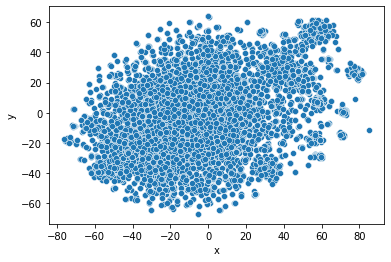

In [29]:
sns.scatterplot(data=tsne_lyrics_and_artist, x='x', y='y')

# Dimension reduction with UMAP

In [32]:
import umap
from sklearn.preprocessing import StandardScaler

In [31]:
reducer = umap.UMAP()

In [40]:
embedding = reducer.fit_transform(
    StandardScaler().fit_transform(message_embeddings)
)

In [45]:
umap_lyrics_and_artist = concat_x_and_y(embedding)
umap_lyrics_and_artist

,Performer,lyric_line,x,y
0,21 Savage,Y'all know what's goin' on,-5.721832,-3.657572
1,21 Savage,21 Gang 'til I'm gone,-7.456961,-0.389396
2,21 Savage,4L Gang 'til I'm gone,-7.534868,-0.427984
3,21 Savage,"If Young Metro don't trust you, I'm gon'â",-7.004807,-0.871901
4,21 Savage,"Roll the window down, stick the Glock out (Sti...",-7.059326,1.217195
...,...,...,...,...
4780,John Mayer,And I'll always let hope in wherever I'll be,-4.075142,-4.187209
4781,John Mayer,"And if I go blind, I'd still find my way",-3.984455,-4.174072
4782,John Mayer,I guess I just felt like givin' up today,-5.471434,-3.197392
4783,John Mayer,[Outro],-6.168602,12.748137


<AxesSubplot:xlabel='x', ylabel='y'>

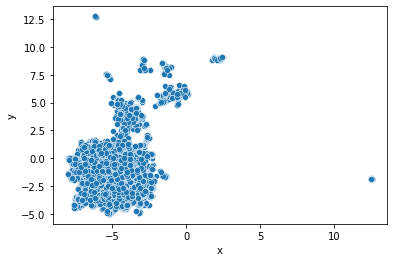

In [49]:
sns.scatterplot(data=umap_lyrics_and_artist, x='x', y='y')

## Export to CSV

In [52]:
def normalize_zero_to_one(s):
    return (s - s.min()) / (s.max() - s.min())

def export_data(data):
    temp = data.copy().dropna()
    temp['x'] = normalize_zero_to_one(temp.x)
    temp['y'] = normalize_zero_to_one(temp.y)
    temp['x'] = temp['x'].round(3)
    temp['y'] = temp['y'].round(3)
    export = temp[['lyric_line', 'x', 'y']]
    export.to_csv('./data/viz ready export.csv', index=False)
    return export

In [48]:
export_data(umap_lyrics_and_artist)


,lyric_line,x,y
0,Y'all know what's goin' on,0.111,0.076
1,21 Gang 'til I'm gone,0.026,0.260
2,4L Gang 'til I'm gone,0.022,0.257
3,"If Young Metro don't trust you, I'm gon'â",0.048,0.232
4,"Roll the window down, stick the Glock out (Sti...",0.046,0.350
...,...,...,...
4780,And I'll always let hope in wherever I'll be,0.191,0.046
4781,"And if I go blind, I'd still find my way",0.195,0.047
4782,I guess I just felt like givin' up today,0.123,0.102
4783,[Outro],0.089,0.999
